# CIFAR - CNN

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2


2025-06-01 15:56:39.099180: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-01 15:56:39.309375: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-01 15:56:39.310884: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-01 15:56:42.562660: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Invalid MIT-MAGIC-COOKIE-1 key

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape',  x_test.shape)
print('y_test shape',  y_test.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [4]:
print(f"Number of classes: {len(np.unique(y_train))}")
print("Classes:", np.unique(y_train))

Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
# y_train

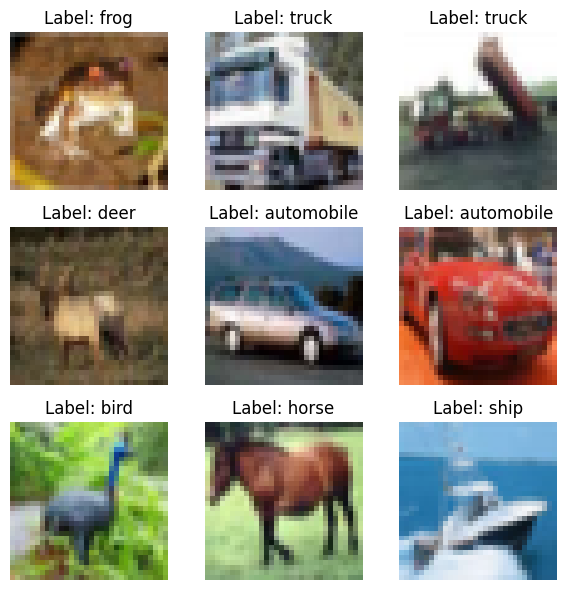

In [7]:

# 3. Display some sample images from the training dataset
plt.figure(figsize=(6, 6))
for i in range(9):
    # for j in clothes_names:
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray') # rainbow
    # print(class_names[y_train[i][0]])
    plt.title(f"Label: {class_names[y_train[i][0]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
# 4. Preprocess the data: normalize
# 0 (black) → 255 (white or full intensity)
x_train_norm = x_train.astype('float32') / 255.0 # 255 is the max pixel value in an 8-bit grayscale image
x_test_norm  = x_test.astype('float32') / 255.0


In [9]:
# 5. Build the neural network model
from tensorflow.keras import models, layers, regularizers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    
    # # layers.Flatten(input_shape=(32, 32, 3)), # Automatically flattens from (32, 32, 3) 
    # layers.Dense(512, activation='relu'),#, kernel_regularizer=l1(0.001)),BatchNormalization(),
    # layers.Dense(256, activation='relu'),#, kernel_regularizer=l2(0.001)),BatchNormalization(),
    # layers.Dense(128, activation='relu'),#, kernel_regularizer=l2(0.001)),BatchNormalization(),
    # layers.Dense(64, activation='relu'),#, kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),BatchNormalization(),
    # layers.Dense(10, activation='softmax') # Here, number of class labels = 10, so output layers should be 10
   
    layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)), layers.BatchNormalization(), 
    layers.Activation('relu'), layers.Dropout(0.3),
    layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)), layers.BatchNormalization(), 
    layers.Activation('relu'), layers.Dropout(0.3),
    layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)), layers.BatchNormalization(), 
    layers.Activation('relu'), layers.Dropout(0.3),
    layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)), layers.BatchNormalization(), 
    layers.Activation('relu'), layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


2025-06-01 15:56:56.935852: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-01 15:56:56.940833: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
# 6. Compile the model
from tensorflow.keras.optimizers import Adam, SGD

# model.compile(optimizer= 'adam', #Adam(learning_rate=0.001),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)
]


In [12]:
%%time
# 7. Train the model
# model.fit(x_train_norm, y_train, epochs=10, validation_data=(x_test_norm, y_test))
model_fit = model.fit(x_train_norm, y_train, epochs=10, batch_size=64, validation_data=(x_test_norm, y_test),
                     callbacks=callbacks, verbose=1)


2025-06-01 15:57:03.348390: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
  1/782 [..............................] - ETA: 1:41:38 - loss: 20.3019 - accuracy: 0.1562

2025-06-01 15:57:16.330221: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.
2025-06-01 15:57:16.334955: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.
2025-06-01 15:57:16.389159: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 14266368 exceeds 10% of free system memory.


  2/782 [..............................] - ETA: 4:23 - loss: 20.3589 - accuracy: 0.1641   

2025-06-01 15:57:16.650577: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.


782/782 [==============================] - 198s 244ms/step - loss: 15.3453 - accuracy: 0.2547 - val_loss: 12.0587 - val_accuracy: 0.4275 - lr: 1.0000e-04
Epoch 2/10
782/782 [==============================] - 188s 241ms/step - loss: 10.4099 - accuracy: 0.4077 - val_loss: 8.8696 - val_accuracy: 0.4439 - lr: 1.0000e-04
Epoch 3/10
782/782 [==============================] - 198s 253ms/step - loss: 7.5206 - accuracy: 0.4921 - val_loss: 6.4030 - val_accuracy: 0.5241 - lr: 1.0000e-04
Epoch 4/10
782/782 [==============================] - 219s 280ms/step - loss: 5.5428 - accuracy: 0.5486 - val_loss: 4.7433 - val_accuracy: 0.5879 - lr: 1.0000e-04
Epoch 5/10
782/782 [==============================] - 185s 236ms/step - loss: 4.2498 - accuracy: 0.5954 - val_loss: 3.7766 - val_accuracy: 0.5970 - lr: 1.0000e-04
Epoch 6/10
782/782 [==============================] - 195s 250ms/step - loss: 3.4124 - accuracy: 0.6285 - val_loss: 3.0864 - val_accuracy: 0.6203 - lr: 1.0000e-04
Epoch 7/10
782/782 [==========

In [13]:
# 8. Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 13s 43ms/step - loss: 1.8759 - accuracy: 0.6996

Test accuracy: 0.6996


In [14]:
# 9. Predict
y_pred = model.predict(x_test_norm)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 [==============================] - 12s 37ms/step


# Evaluation

313/313 [==============================] - 13s 41ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.46      0.63     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.46     10000
   macro avg       0.11      0.05      0.07     10000
weighted avg       1.00      0.46      0.63     10000



/home/akashs/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akashs/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akashs/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


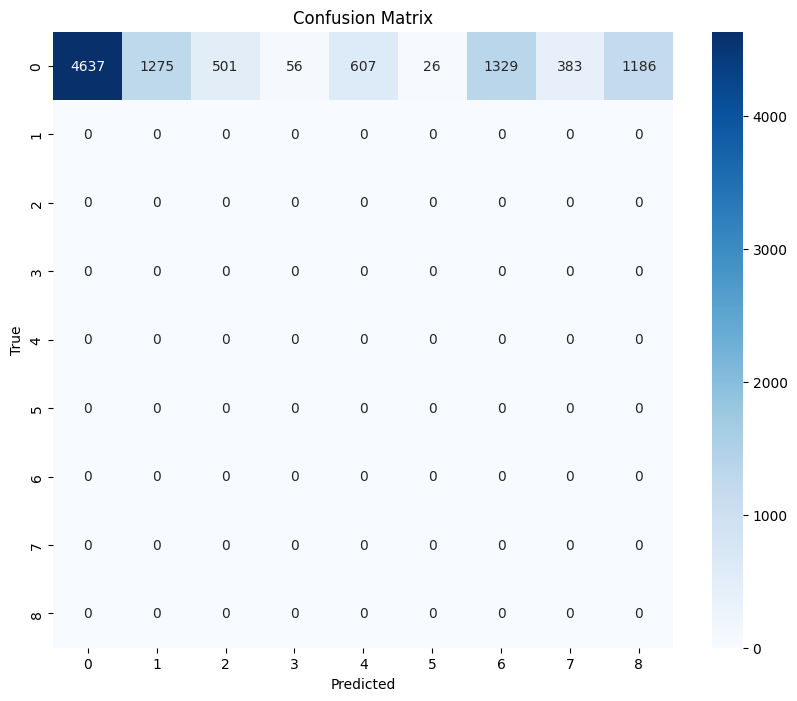

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# # Build and train the best model using best hyperparameters
# best_model = tuner.hypermodel.build(best_hyperparams)
# best_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Predict on test data
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [17]:
print(y_pred_classes.shape)
print(y_test.shape)


(10000,)
(10000, 1)


# Actual Vs Predicted

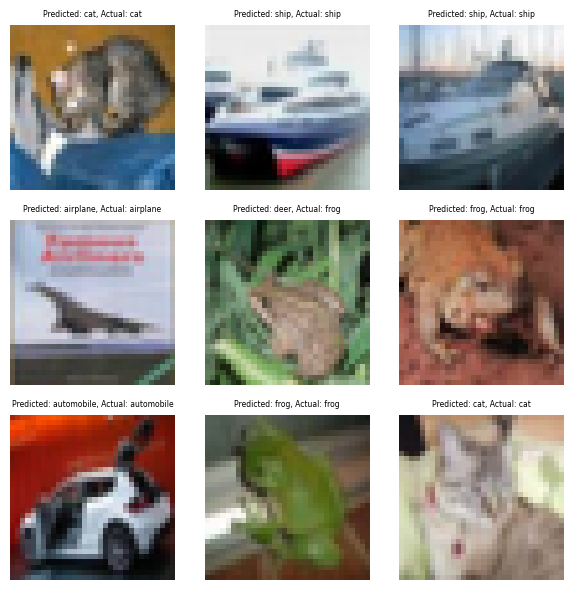

In [18]:
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test_norm[i], cmap='gray')
    # plt.title(f"Label: {y_pred_classes[i]}")
    # plt.title(f"Predicted: {class_names[y_pred_classes[i][0]]})#, Actual: {class_names[y_test[i][0]]}", fontsize=5.5)
    plt.title(f"Predicted: {class_names[y_pred_classes[i]]}, Actual: {class_names[y_test[i][0]]}", fontsize=5.5)

    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
# # 5. Build the neural network model
# model = models.Sequential([